## [Statistics] Is the coin biased?: Google [Medium]

A coin was flipped 1000 times, and 550 times it showed up heads. Do you think the coin is biased? Why or why not?

### Generate Data

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

import pymc3 as pm
import random

random.seed(42)

HEADS, TAILS = 1, 0
n_trials = 1000
n_heads = 550

data = [HEADS] * n_heads + [TAILS] * (n_trials - n_heads) 
random.shuffle(data)

### Define Model

We define the data generation process as follows. Let the prior distribution of the bias of the coin, $\theta$, be distributed uniformly across the interval $[0, 1]$. Thus, we choose $\theta \sim \text{Beta}(1, 1)$, as $\text{Beta}(1, 1)$ is equivalent to the uniform distribution and it is also conjugate to the Binomial.

Thereafter, as we have $\theta$, we carry out $n$ Bernoulli experiments. 

$$ X_i \sim \text{Bernolli}(\theta) \quad \forall  i = [1, \cdots, n]$$

**Note:** For this example, it is possible to calculate the posterior distribution analytically fairly easily, but here we have used a computational approach using MCMC.

In [28]:
with pm.Model() as coin_flips:
    theta = pm.Beta('theta', alpha=1, beta=1)
    pm.Bernoulli('y', p=theta, observed=data)
    trace = pm.sample(5000, random_seed=2019, chains=4, tune=1000)
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [theta]
Sampling 4 chains, 0 divergences: 100%|██████████| 24000/24000 [00:08<00:00, 2717.78draws/s]


### Post Experiment Analysis

In [29]:
summary = pm.summary(trace)
summary

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
theta,0.55,0.016,0.521,0.58,0.0,0.0,8269.0,8264.0,8261.0,13568.0,1.0


In [30]:
mean = summary['mean'].values[0]
hpd_3 = summary['hpd_3%'].values[0]
hpd_97 = summary['hpd_97%'].values[0]

Text(0.5, 1.0, 'Posterior Distribution of theta')

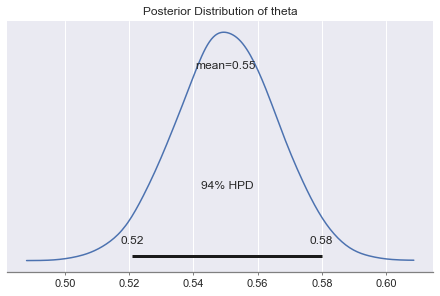

In [48]:
pm.plot_posterior(trace)
plt.title("Posterior Distribution of theta")

Here, we see the posterior distribution of $\theta$. It appears that the 94% high density interval lies in the range $[0.52, 0.58]$. It does not contain the value $0.50$, thus, according to our analysis we can say that with probability 94%, the true $\theta$ lies in the interval $[0.52, 0.58]$ and we can conclude that the coin is unfair.